In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
import Model
import warnings

warnings.simplefilter('ignore', FutureWarning)

if __name__ == "__main__":
	t0 = time.time()
	featureList = ['EPS Growth', 'Volatility 180 D', 'Trailing EPS', 'Price to Cash Flow', 'EPS', 'Volume', 'Return on Assets', 'Price to Book', 'Dividend Yield', 'Total Debt to Total Equity', 'Return on Invested Capital', 'Return on Common Equity']
	train, validate, test = Model.splitData(200,3,12)
	randForest = Model.buildWithIndexesTripleClass(modelType = Model.randomForestClassifier, indexes = train, target= 'Rate of Return', features = featureList, featureLength = 12,\
									targetLength = 3, sector = "Financials", percentileTarget = 90, percentileAvoid = 10, verbose = True)
	print("Labels: ")
	print(randForest.classes_)
	print("Importances: ")
	print(randForest.feature_importances_)

[-189 -162  -42  -99 -180 -165  -81  -72 -153 -123  -60 -144  -24 -168 -108
  -36  -66 -114 -171 -183 -177 -120 -111  -45 -117  -54  -87 -156 -201  -63
  -48  -18 -105 -126 -135 -132  -30]
[ -90 -198  -96  -51 -129 -174 -150  -57  -21  -27  -39 -159]
[-195  -78 -192  -93 -102 -147  -84  -33  -69  -75 -138 -141 -186]
Index: -189
0.0 percent complete with preparing data.
Index: -162
2.7027027027027026 percent complete with preparing data.
Index: -42
5.405405405405405 percent complete with preparing data.
Index: -99
8.108108108108109 percent complete with preparing data.
Index: -180
10.81081081081081 percent complete with preparing data.
Index: -165
13.513513513513514 percent complete with preparing data.
Index: -81
16.216216216216218 percent complete with preparing data.
Index: -72
18.91891891891892 percent complete with preparing data.
Index: -153
21.62162162162162 percent complete with preparing data.
Index: -123
24.324324324324326 percent complete with preparing data.
Index: -60
27.02

In [2]:
precisions = {'seen':{}, 'above10':{}, 'above75':{}, 'above50':{}, 'above25':{}, 'above90':{}}
betterThan = {}
for prob in range(0,100,5):
	precisions['seen'][prob] = 0
	precisions['above10'][prob] = 0
	precisions['above75'][prob] = 0
	precisions['above50'][prob] = 0
	precisions['above25'][prob] = 0
	precisions['above90'][prob] = 0
for i in validate:
	addedStocks, probabilities = Model.predict_probabilities(randForest, startIndex = i, endIndex = i+11, features = featureList, sector = "Financials")
	actual = []
	for prob in range(0,100,5):
		betterThan[prob] = []
	for stock in addedStocks:
		actual.append(Model.rateOfReturn(Model.retrieveData(stock, 'Last Price', i+12, i+14, [])))
	for i in range(len(probabilities)):
		for prob in range(0,100,5):
			if probabilities[i][1] > prob / 100:
				betterThan[prob].append(1)
			else:
				betterThan[prob].append(0)
	for prob in range(0,100,5):
		if sum(betterThan[prob]) > 0:
			precisions['above10'][prob] = (Model.precision(Model.getPercentile(actual, 10),betterThan[prob]) * len(betterThan[prob]) + precisions['above10'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above75'][prob] = (Model.precision(Model.getPercentile(actual, 75),betterThan[prob]) * len(betterThan[prob]) + precisions['above75'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above50'][prob] = (Model.precision(Model.getPercentile(actual, 50), betterThan[prob]) * len(betterThan[prob]) + precisions['above50'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above25'][prob] = (Model.precision(Model.getPercentile(actual, 25), betterThan[prob]) * len(betterThan[prob]) + precisions['above25'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above90'][prob] = (Model.precision(Model.getPercentile(actual, 90), betterThan[prob]) * len(betterThan[prob]) + precisions['above90'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['seen'][prob] = precisions['seen'][prob] + len(betterThan[prob])
x = []
y90 = []
y75 = []
y50 = []
y25 = []
y10 = []
counts = []
for prob in range(0,100,5):
	print(str(prob) + " above 90th percentile: " + str(precisions['above90'][prob]))
	print(str(prob) + " above 75th percentile: " + str(precisions['above75'][prob]))
	print(str(prob) + " above 50th percentile: " + str(precisions['above50'][prob]))
	print(str(prob) + " above 25th percentile: " + str(precisions['above25'][prob]))
	print(str(prob) + " above 10th percentile: " + str(precisions['above10'][prob]))
	counts.append(sum(betterThan[prob]))
	if (precisions['above10'][prob]) > 0:
		y90.append(precisions['above90'][prob])
		y75.append(precisions['above75'][prob])
		y50.append(precisions['above50'][prob])
		y25.append(precisions['above25'][prob])
		y10.append(precisions['above10'][prob])
		x.append(prob)

print(time.time() - t0, "seconds wait time")

0 above 90th percentile: 0.100205761317
0 above 75th percentile: 0.248971193416
0 above 50th percentile: 0.49670781893
0 above 25th percentile: 0.745061728395
0 above 10th percentile: 0.894238683128
5 above 90th percentile: 0.112739232445
5 above 75th percentile: 0.265321224434
5 above 50th percentile: 0.509957670328
5 above 25th percentile: 0.747368080405
5 above 10th percentile: 0.890467007075
10 above 90th percentile: 0.140244987607
10 above 75th percentile: 0.298000031576
10 above 50th percentile: 0.541728399368
10 above 25th percentile: 0.756744764611
10 above 10th percentile: 0.890932284733
15 above 90th percentile: 0.173480670668
15 above 75th percentile: 0.335394877044
15 above 50th percentile: 0.55649307307
15 above 25th percentile: 0.756115154775
15 above 10th percentile: 0.889398744193
20 above 90th percentile: 0.209011541155
20 above 75th percentile: 0.365442667195
20 above 50th percentile: 0.57346577684
20 above 25th percentile: 0.765169085366
20 above 10th percentile: 0.8

Counts: 
[345, 259, 173, 131, 95, 78, 66, 50, 43, 36, 26, 23, 15, 12, 10, 6, 4, 1, 0, 0]


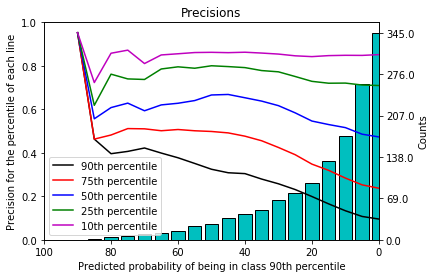

In [3]:
print("Counts: ")
print(counts)
fig = plt.figure()
axes = plt.gca()
axes.set_xlim([0,100])
axes.set_xlim([0,100])
plt.title("Precisions")
plt.xlabel('Predicted probability of being in class 90th percentile')
plt.ylabel('Precision for the percentile of each line')
axes.invert_xaxis()
bar = axes.twinx()
rects = bar.bar(x = list(range(0,100,5)), height = list(map(lambda x: x/max(counts),counts)), width = 4, color = 'c', linestyle = 'solid', edgecolor = 'k', zorder = -1)
bar.set_yticklabels(list(map(lambda x: x * max(counts) / 5, range(0,6,1))))
bar.set_ylabel('Counts', color = 'k')
plt.plot(x, y90, color = 'k', label = "90th percentile")
plt.plot(x, y75, color = 'r', label = "75th percentile")
plt.plot(x, y50, color = 'b', label = "50th percentile")
plt.plot(x, y25, color = 'g', label = "25th percentile")
plt.plot(x, y10, color = 'm', label = "10th percentile")
plt.legend()

In [4]:
fig.savefig(str(time.time()) + 'test.jpg')
plt.show()

Feature ranking:
1. Volatility 180 D (0.101133)
2. EPS Growth (0.091842)
3. Price to Book (0.089757)
4. Volume (0.089508)
5. Price to Cash Flow (0.088912)
6. Return on Invested Capital (0.085160)
7. Return on Common Equity (0.083894)
8. Total Debt to Total Equity (0.083804)
9. Trailing EPS (0.075284)
10. EPS (0.075172)
11. Dividend Yield (0.067825)
12. Return on Assets (0.067708)


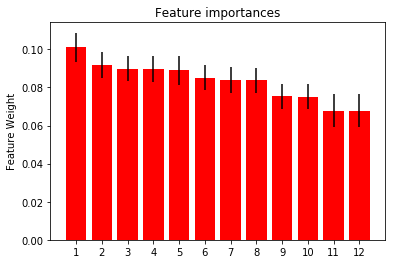

In [5]:
# adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

importances = randForest.feature_importances_
std = np.std([est.feature_importances_ for est in randForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(featureList)):
    print("%d. %s (%f)" % (f + 1, featureList[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(featureList)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(len(featureList)), range(1,len(featureList)+1))
plt.xlim([-1, len(featureList)])
plt.ylabel('Feature Weight')
plt.show()